In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [3]:
n_classes = 10

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)


In [5]:
model = Sequential()

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(90, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 16s 34ms/step - loss: 0.4460 - accuracy: 0.8425 - val_loss: 0.3480 - val_accuracy: 0.8767
Epoch 2/10
469/469 [==============================] - 16s 33ms/step - loss: 0.2937 - accuracy: 0.8938 - val_loss: 0.3037 - val_accuracy: 0.8879
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.2473 - accuracy: 0.9106 - val_loss: 0.2925 - val_accuracy: 0.8957
Epoch 4/10
469/469 [==============================] - 16s 33ms/step - loss: 0.2122 - accuracy: 0.9232 - val_loss: 0.3061 - val_accuracy: 0.8902
Epoch 5/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1872 - accuracy: 0.9316 - val_loss: 0.2883 - val_accuracy: 0.8947
Epoch 6/10
469/469 [==============================] - 16s 33ms/step - loss: 0.1653 - accuracy: 0.9401 - val_loss: 0.2746 - val_accuracy: 0.9055
Epoch 7/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1467 - accuracy: 0.9463 - val_loss: 0.2876 - val_accuracy:

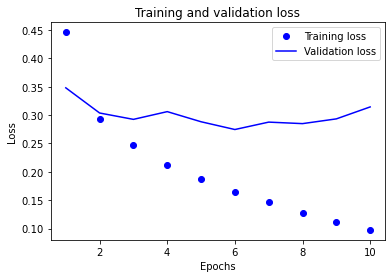

In [6]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()